In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.linear_model import SGDRegressor

In [114]:
def initialize(x):
        random.seed(10)
        bias=random.random()
        theta=np.random.rand(len(x.columns))
        #print("Bias: ",bias,"theta: ",theta)
        return bias,theta
  
def predict_Y(x, b ,theta):
        return b + np.dot(x, theta)

def get_cost(y, Y_pre):
        Y_resd=yield-Y_pre
        return np.sum(np.dot(Y_resd.T,Y_resd))/len(y-Y_resd)
  
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
        dbias=(np.sum(y_hat-y)*2)/len(y)
        dtheta=(np.dot((y_hat-y),x)*2)/len(y)
        bias_new=b_0-learning_rate*dbias
        theta_new=theta_o-learning_rate*dtheta
        return bias_new,theta_new

def run_gradient_descent(x,y,alpha,num_iterations):
        bias,theta=initialize(x)
        iter_num=0
        result_idx=0
        for each_iter in range(num_iterations):
            Y_pre=predict_Y(x, bias,theta)
            this_cost=get_cost(y,Y_pre)
            prev_bias=bias
            prev_theta=theta
            bias,theta=update_theta(x,y,Y_pre,prev_bias,prev_theta,alpha)
        return bias,theta
      

def gradient_descent(x,y,x_test,alpha,num_iterations):
  bias,theta=run_gradient_descent(x,y,alpha,num_iterations)
  return predict_Y(x_test, bias ,theta)

In [104]:
parkinson_path = '/content/drive/MyDrive/Colab Notebooks/parkinsons_updrs.csv'
possum_path= '/content/drive/MyDrive/Colab Notebooks/possum.csv'
diamonds_path = '/content/drive/MyDrive/Colab Notebooks/diamonds.csv'

In [105]:
parkinsons  = pd.read_csv(parkinson_path)
possum = pd.read_csv(possum_path)
diamonds = pd.read_csv(diamonds_path)

In [106]:
X_parkinsons= parkinsons.drop(['motor_UPDRS','total_UPDRS'],axis=1)
y_parkinsons= parkinsons["total_UPDRS"]
x_train_parkinsons, x_test_parkinsons, y_train_parkinsons, y_test_parkinsons = train_test_split(X_parkinsons, y_parkinsons, test_size=0.2, random_state= 0)
x_train_parkinsons=x_train_parkinsons.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
x_test_parkinsons=x_test_parkinsons.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
# scale data
scaler = StandardScaler()
x_train_parkinsons_sc =  scaler.fit_transform(x_train_parkinsons)
x_test_parkinsons_sc =  scaler.fit_transform(x_test_parkinsons)

In [ ]:
possum = possum.dropna()
possum['sex'].replace({'m':0, 'f':1}, inplace=True)
possum['Pop'].replace({'Vic':0, 'other':1, }, inplace=True)
#possum_norm=possum.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
X_possum= possum.drop(possum.columns[[0,4]], axis=1) 
y_possum=possum["age"]
x_train_possum, x_test_possum, y_train_possum, y_test_possum = train_test_split(X_possum, y_possum, test_size=0.2, random_state= 0)
# scale data
x_train_possum=x_train_possum.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
x_test_possum=x_test_possum.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
scaler = StandardScaler()
x_train_possum_sc =  scaler.fit_transform(x_train_possum)
x_test_possum_sc =  scaler.fit_transform(x_test_possum)

In [108]:
diamonds['cut'].replace({'Fair':0, 'Good':1, '\'Very Good\'':2, 'Premium':3, 'Ideal':4}, inplace=True)
diamonds['color'].replace({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}, inplace=True)
diamonds['clarity'].replace({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}, inplace=True)
#diamonds_norm=diamonds.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
X_diamonds= diamonds.drop(diamonds.columns[[6]], axis=1) 
y_diamonds=diamonds["price"]
x_train_diamonds, x_test_diamonds, y_train_diamonds, y_test_diamonds = train_test_split(X_diamonds, y_diamonds, test_size=0.2, random_state= 0)
# scale data
x_train_diamonds=x_train_diamonds.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
x_test_diamonds=x_test_diamonds.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

scaler = StandardScaler()
x_train_diamonds_sc =  scaler.fit_transform(x_train_diamonds)
x_test_diamonds_sc =  scaler.fit_transform(x_test_diamonds)

In [175]:
random.seed(10)
predict = gradient_descent(x_train_parkinsons, y_train_parkinsons, x_test_parkinsons,alpha=0.01,num_iterations=2000)

print("My Gradient Descent ")
res = mean_squared_error(y_test_parkinsons, predict)
print("mean_squared_error results: ", res)
res1 = mean_absolute_error(y_test_parkinsons, predict)
print("mean_absolute_error results: ", res1)


regressor = SGDRegressor(max_iter=2000, tol=1e-3,alpha=0.01)
regressor.fit(x_train_parkinsons_sc, y_train_parkinsons)
predict_sklearn = regressor.predict(x_test_parkinsons_sc)

print("Sklearn Gradient Descent ")
res = mean_squared_error(y_test_parkinsons, predict_sklearn)
print("mean_squared_error results: ", res)
res1 = mean_absolute_error(y_test_parkinsons, predict_sklearn)
print("mean_absolute_error results: ", res1)


My Gradient Descent 
mean_squared_error results:  85.18720217682989
mean_absolute_error results:  7.475742365901121
Sklearn Gradient Descent 
mean_squared_error results:  85.49162827196018
mean_absolute_error results:  7.4875088683885345


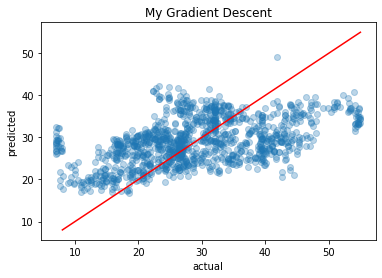

In [121]:
plt.scatter(y_test_parkinsons,predict,alpha=0.3)
plt.ylabel("predicted" )
plt.xlabel("actual")
plt.title("My Gradient Descent")
plt.plot([8,55], [8,55], color="red")
plt.savefig('map.png')
plt.show()

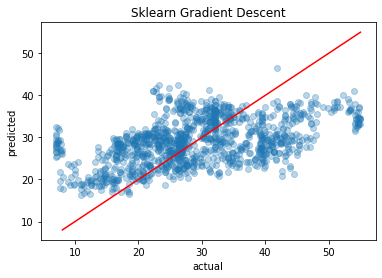

In [176]:
plt.scatter(y_test_parkinsons,predict_sklearn,alpha=0.3)
plt.ylabel("predicted" )
plt.xlabel("actual")
plt.title("Sklearn Gradient Descent")
plt.plot([8,55], [8,55], color="red")
plt.savefig('map.png')
plt.show()

In [123]:
random.seed(10)
predict = gradient_descent(x_train_possum, y_train_possum, x_test_possum,alpha=0.1,num_iterations=1500)

print("My Gradient Descent ")
res = mean_squared_error(y_test_possum, predict)
print("mean_squared_error results: ", res)
res1 = mean_absolute_error(y_test_possum, predict)
print("mean_absolute_error results: ", res1)


regressor = SGDRegressor(max_iter=1500, tol=1e-3,alpha=0.1)
regressor.fit(x_train_possum_sc, y_train_possum)
predict_sklearn = regressor.predict(x_test_possum_sc)

print("Sklearn Gradient Descent ")
res = mean_squared_error(y_test_possum, predict_sklearn)
print("mean_squared_error results: ", res)
res1 = mean_absolute_error(y_test_possum, predict_sklearn)
print("mean_absolute_error results: ", res1)

My Gradient Descent 
mean_squared_error results:  3.8339372558831117
mean_absolute_error results:  1.5044449023025952
Sklearn Gradient Descent 
mean_squared_error results:  3.817546383764308
mean_absolute_error results:  1.5147061945312212


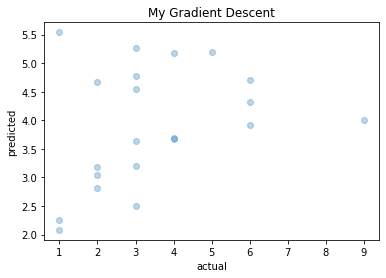

In [127]:
plt.scatter(y_test_possum,predict,alpha=0.3)
plt.ylabel("predicted" )
plt.xlabel("actual")
plt.title("My Gradient Descent")
plt.savefig('map.png')
plt.show()

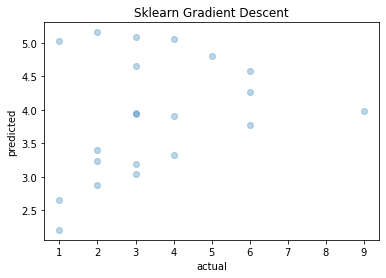

In [126]:
plt.scatter(y_test_possum,predict_sklearn,alpha=0.3)
plt.ylabel("predicted" )
plt.xlabel("actual")
plt.title("Sklearn Gradient Descent")
plt.savefig('map.png')
plt.show()

In [140]:
random.seed(10)
predict = gradient_descent(x_train_diamonds, y_train_diamonds, x_test_diamonds,alpha=0.1,num_iterations=1500)

print("My Gradient Descent ")
res = mean_squared_error(y_test_diamonds, predict)
print("mean_squared_error results: ", res)
res1 = mean_absolute_error(y_test_diamonds, predict)
print("mean_absolute_error results: ", res1)


regressor = SGDRegressor(max_iter=1500, tol=1e-3,alpha=0.0001)
regressor.fit(x_train_diamonds_sc, y_train_diamonds)
predict_sklearn = regressor.predict(x_test_diamonds_sc)

print("Sklearn Gradient Descent ")
res = mean_squared_error(y_test_diamonds, predict_sklearn)
print("mean_squared_error results: ", res)
res1 = mean_absolute_error(y_test_diamonds, predict_sklearn)
print("mean_absolute_error results: ", res1)


My Gradient Descent 
mean_squared_error results:  1436213.320825175
mean_absolute_error results:  807.6643110180447
Sklearn Gradient Descent 
mean_squared_error results:  1454411.0158537535
mean_absolute_error results:  819.4387211228405


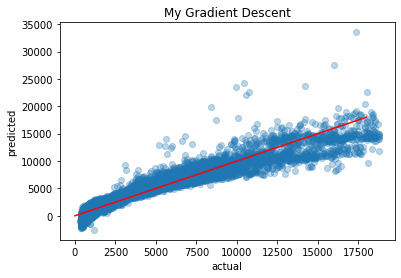

In [141]:
plt.scatter(y_test_diamonds,predict,alpha=0.3)
plt.ylabel("predicted" )
plt.xlabel("actual")
plt.title("My Gradient Descent")
plt.plot([0,18000], [0,18000], color="red")
plt.savefig('map.png')
plt.show()

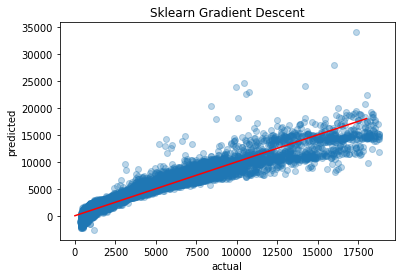

In [142]:
plt.scatter(y_test_diamonds,predict_sklearn,alpha=0.3)
plt.ylabel("predicted" )
plt.xlabel("actual")
plt.title("Sklearn Gradient Descent")
plt.plot([0,18000], [0,18000], color="red")
plt.savefig('map.png')
plt.show()

In [169]:
from sklearn.model_selection import KFold

def CV_final(x_train, y_train, k_cv, alpha, iter, metric):

  kf = KFold(n_splits=k_cv)

  if(metric == "MAE"):
    metric_func = mean_absolute_error
  elif (metric == "MSE"): 
    metric_func = mean_squared_error

  err=[]
  for train, test in kf.split(x_train):
    predict = gradient_descent(x_train.iloc[train], y_train.iloc[train], x_train.iloc[test],alpha,iter)
    err.append(metric_func(y_train.iloc[test], predict))

  return err 


In [171]:
CV_final(x_train_parkinsons, y_train_parkinsons,5,0.01,2000,"MAE")

[7.414389785606961,
 7.61887218664463,
 7.668909976421848,
 7.46570912377328,
 7.949466999823106]

In [170]:
CV_final(x_train_parkinsons, y_train_parkinsons,5,0.01,2000,"MSE")

[82.00226483152362,
 85.82390690168711,
 87.96057377660851,
 83.35277145742293,
 91.73703132684503]

In [ ]:
CV_final(x_train_possum, y_train_possum,5,0.1,1500,"MAE")


In [ ]:
CV_final(x_train_possum, y_train_possum,5,0.1,1500,"MSE")

In [172]:
CV_final(x_train_diamonds, y_train_diamonds,5,0.1,1500,"MAE")

[805.925810089479,
 815.0542060500818,
 801.4738497227656,
 807.0009722288189,
 813.744170973323]

In [173]:
CV_final(x_train_diamonds, y_train_diamonds,5,0.1,1500,"MSE")

[1484551.6409534998,
 1578888.8897065474,
 1525374.2967232026,
 1396733.0861513107,
 1482892.4734367516]